## **Import Libraries:**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

## **Load Dataset:**

In [4]:
df = pd.read_csv('HR Employee Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())

Shape of dataset: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


## **Data understaning and cleaning:**

### Check info & datatypes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Check for null values

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### Drop irrelevant variables

In [8]:
df.drop(["EmployeeCount","Over18","StandardHours","EmployeeNumber"], axis=1, inplace=True, errors='ignore')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


### Encode Target variable

In [9]:
df["Attrition"] = df["Attrition"].map({"Yes":1, "No":0})

## **EXPLORATORY DATA ANALYSIS (EDA):**

### Attrition by Department

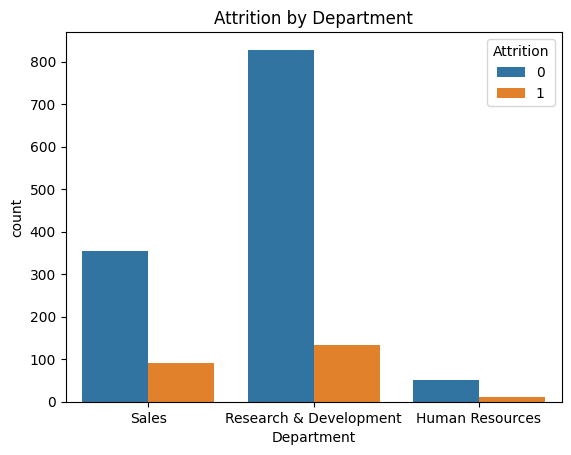

In [10]:
sns.countplot(data=df, x="Department", hue="Attrition")
plt.title("Attrition by Department")
plt.show()

### Attrition by Salary Bands

In [11]:
df["IncomeBand"] = pd.qcut(df["MonthlyIncome"], q=3, labels=["Low","Medium","High"])

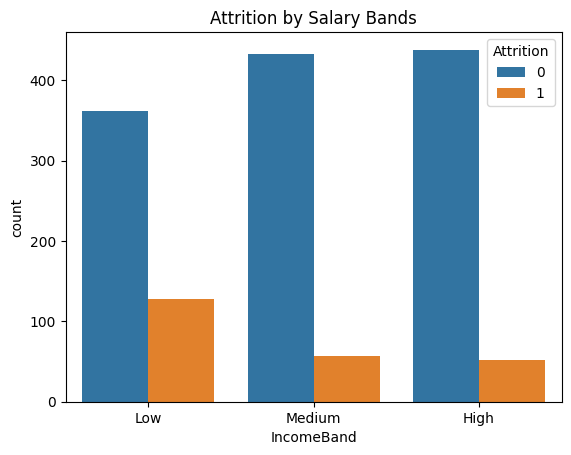

In [12]:
sns.countplot(data=df, x="IncomeBand", hue="Attrition")
plt.title("Attrition by Salary Bands")
plt.show()

### Attrition vs Promotions

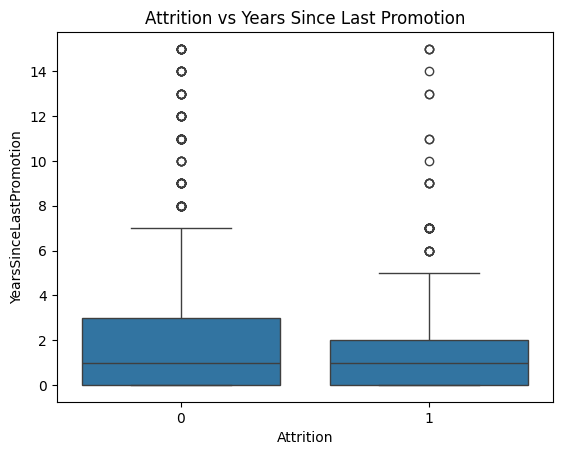

In [13]:
sns.boxplot(data=df, x="Attrition", y="YearsSinceLastPromotion")
plt.title("Attrition vs Years Since Last Promotion")
plt.show()

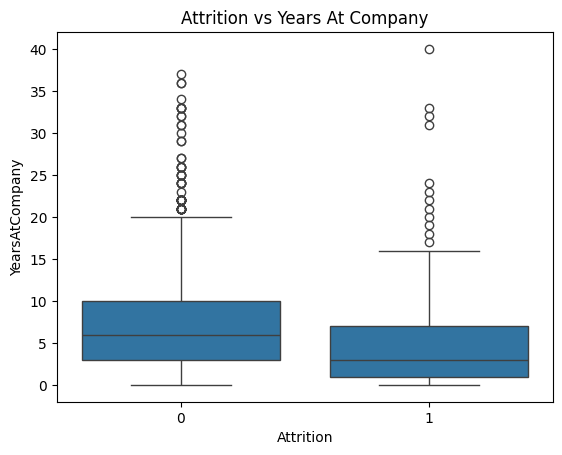

In [15]:
sns.boxplot(data=df, x="Attrition", y="YearsAtCompany")
plt.title("Attrition vs Years At Company")
plt.show()

### Correlation heatmap

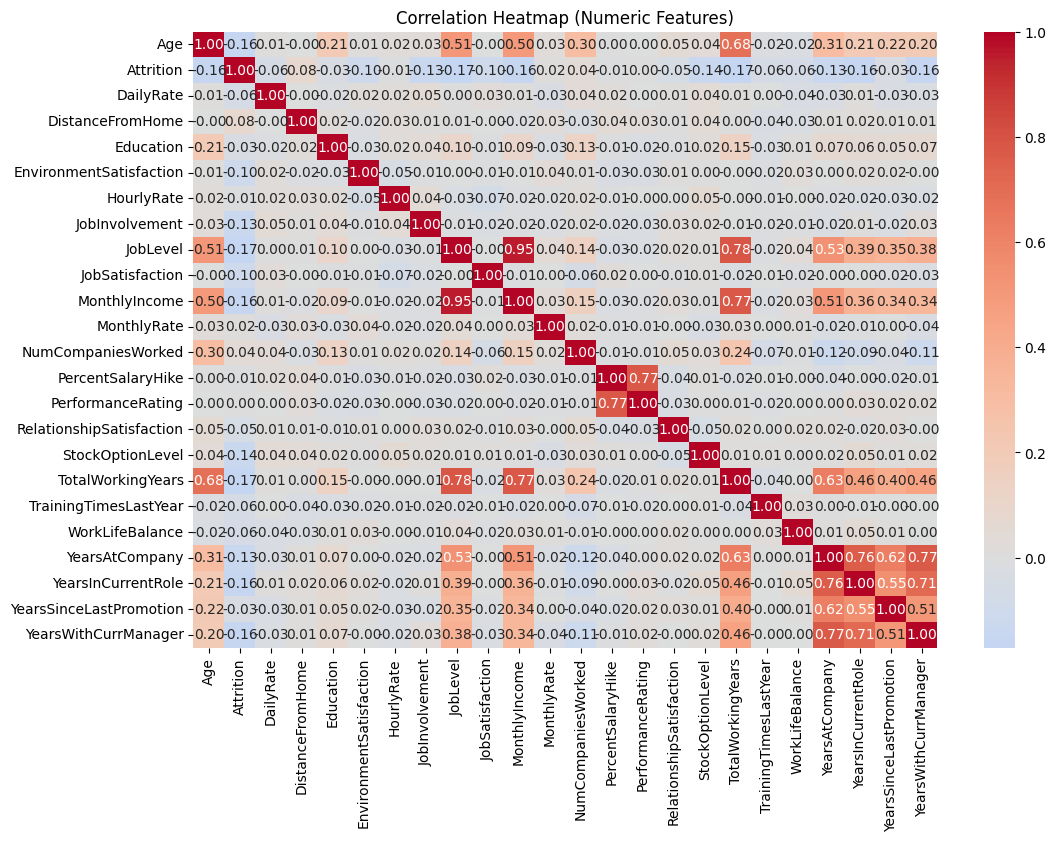

In [16]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, fmt=".2f", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

### Boxplot

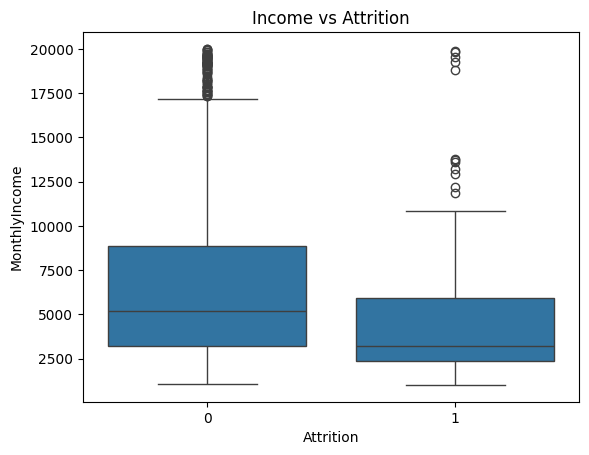

In [17]:
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome")
plt.title("Income vs Attrition")
plt.show()

### Countplots for categorical features

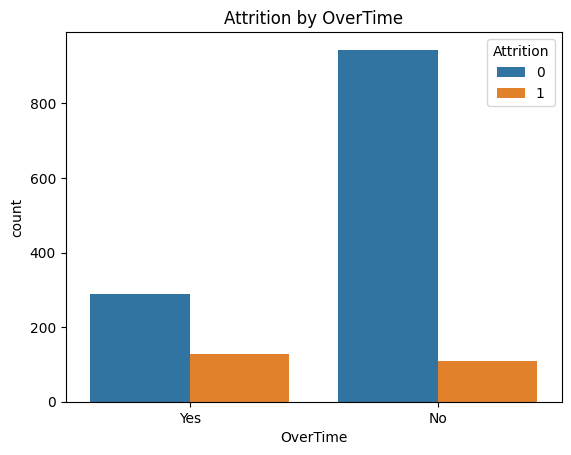

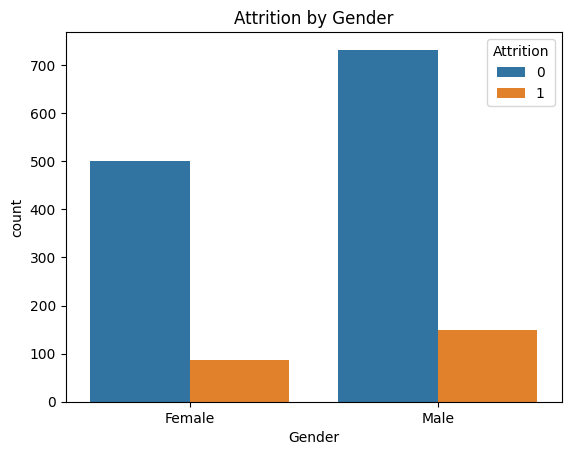

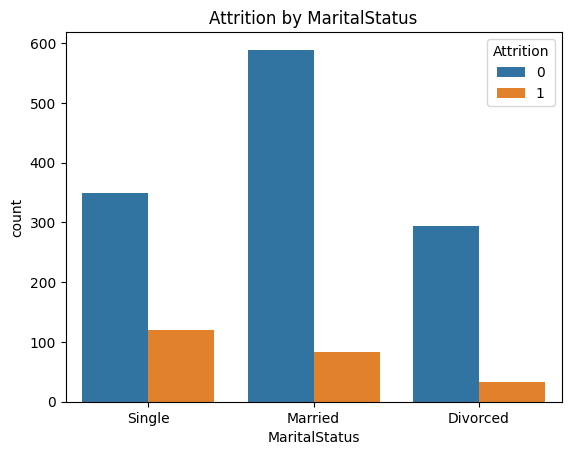

In [18]:
for col in ["OverTime","Gender","MaritalStatus"]:
    sns.countplot(data=df, x=col, hue="Attrition")
    plt.title(f"Attrition by {col}")
    plt.show()

## **Feature Engineering:**

### Create Tenure feature

In [20]:
df["Tenure"] = df["YearsAtCompany"] / df["TotalWorkingYears"].replace(0,1)

### Create Promotion Gap feature

In [21]:
df["PromotionGap"] = df["YearsSinceLastPromotion"] / df["YearsAtCompany"].replace(0,1)

In [22]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeBand,Tenure,PromotionGap
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,8,0,1,6,4,0,5,Medium,0.750000,0.000
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,10,3,3,10,7,1,7,Medium,1.000000,0.100
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,7,3,3,0,0,0,0,Low,0.000000,0.000
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,8,3,3,8,7,3,0,Low,1.000000,0.375
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,6,3,3,2,2,2,2,Low,0.333333,1.000


## **Data Modeling:**

### Train Test Split 

In [23]:
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Print which columns go where (Numerical & Categorical Columns)

In [28]:
# detect categorical columns automatically (dtype = object or category)
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# everything else is numeric
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Numeric cols:", num_cols)
print("Categorical cols:", cat_cols)

Numeric cols: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Tenure', 'PromotionGap']
Categorical cols: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'IncomeBand']


### Pipeline Building for Logistic Regression

In [29]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

log_reg_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500, random_state=42))
])

### Fit Logistic Regression Model

In [30]:
log_reg_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'Relati...
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'Tenure', 'PromotionGap']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime',
                                                   'IncomeBand'])])),
                ('classifier',
                 LogisticRegression(max_iter=500, random_state=42))])

### Predict Logistic Regression Model

In [31]:
y_pred_log = log_reg_model.predict(X_test)
y_proba_log = log_reg_model.predict_proba(X_test)[:,1]

### Evaluation

In [32]:
print("\n Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


 Logistic Regression Results:
Accuracy: 0.8809523809523809
ROC-AUC: 0.8122146610388492

Confusion Matrix:
 [[241   6]
 [ 29  18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.75      0.38      0.51        47

    accuracy                           0.88       294
   macro avg       0.82      0.68      0.72       294
weighted avg       0.87      0.88      0.86       294



### Confusion Matrix Heatmap

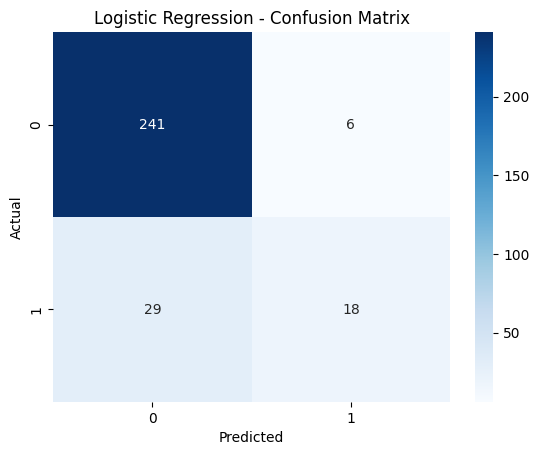

In [33]:
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### ROC Curve

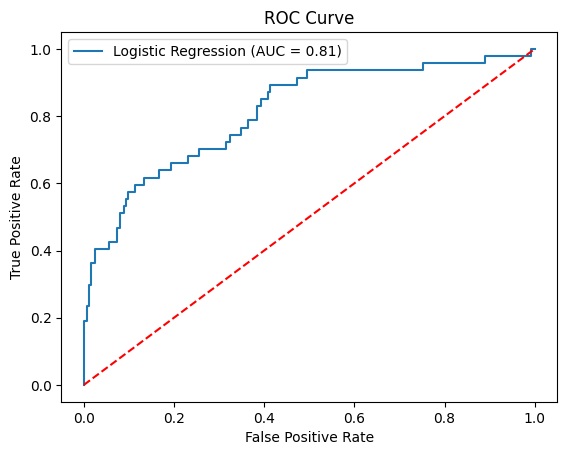

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
fpr, tpr, _ = roc_curve(y_test, y_proba_log)
plt.plot(fpr, tpr, label="Logistic Regression (AUC = {:.2f})".format(roc_auc_score(y_test, y_proba_log)))
plt.plot([0,1],[0,1],'--',color="Red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## **Decision Tree:**

### Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Build pipeline with Decision Tree
from sklearn.pipeline import Pipeline

dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", DecisionTreeClassifier(max_depth=5, random_state=42))
])

### Train and Predict

In [38]:
# Train
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'HourlyRate',
                                                   'JobInvolvement', 'JobLevel',
                                                   'JobSatisfaction',
                                                   'MonthlyIncome',
                                                   'MonthlyRate',
                                                   'NumCompaniesWorked',
                                                   'PercentSalaryHike',
                                                   'PerformanceRating',
                                                   'Relati...
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager',
                                                   'Tenure', 'PromotionGap']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'OverTime',
                                                   'IncomeBand'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [39]:
# Predictions
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:,1]

### Evaluate the model

In [40]:
# Evaluation
print("\n Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


 Decision Tree Results:
Accuracy: 0.8367346938775511
ROC-AUC: 0.6591437677663883

Confusion Matrix:
 [[237  10]
 [ 38   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       247
           1       0.47      0.19      0.27        47

    accuracy                           0.84       294
   macro avg       0.67      0.58      0.59       294
weighted avg       0.80      0.84      0.81       294



### Confusion Matrix Heatmap

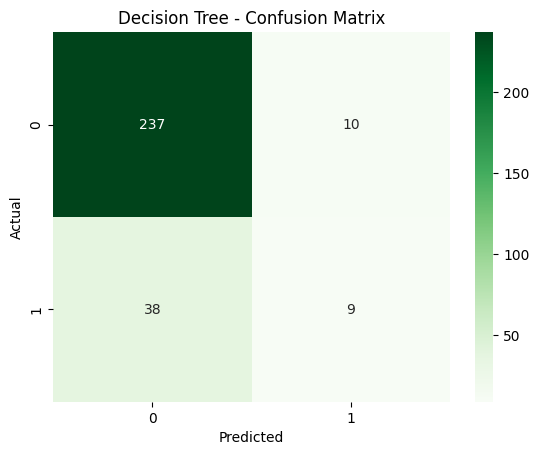

In [41]:
# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## **Compare Models:**

### Comparison table of Logistic Regression vs Decision Tree
### (Accuracy, ROC-AUC, Precision, Recall, F1)

In [42]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [accuracy_score(y_test, y_pred_log), accuracy_score(y_test, y_pred_dt)],
    "ROC-AUC": [roc_auc_score(y_test, y_proba_log), roc_auc_score(y_test, y_proba_dt)],
    "F1-Score": [
        classification_report(y_test, y_pred_log, output_dict=True)["weighted avg"]["f1-score"],
        classification_report(y_test, y_pred_dt, output_dict=True)["weighted avg"]["f1-score"]
    ]
})

print(results)

                 Model  Accuracy   ROC-AUC  F1-Score
0  Logistic Regression  0.880952  0.812215  0.864318
1        Decision Tree  0.836735  0.659144  0.806481


## **Feature Importance (Decision Tree):**

### Feature names & Importances 

In [43]:
# Get feature names after preprocessing
feature_names = (dt_model.named_steps["preprocessor"]
                 .get_feature_names_out())

In [45]:
# Get feature importances
importances = dt_model.named_steps["classifier"].feature_importances_
indices = np.argsort(importances)[::-1]

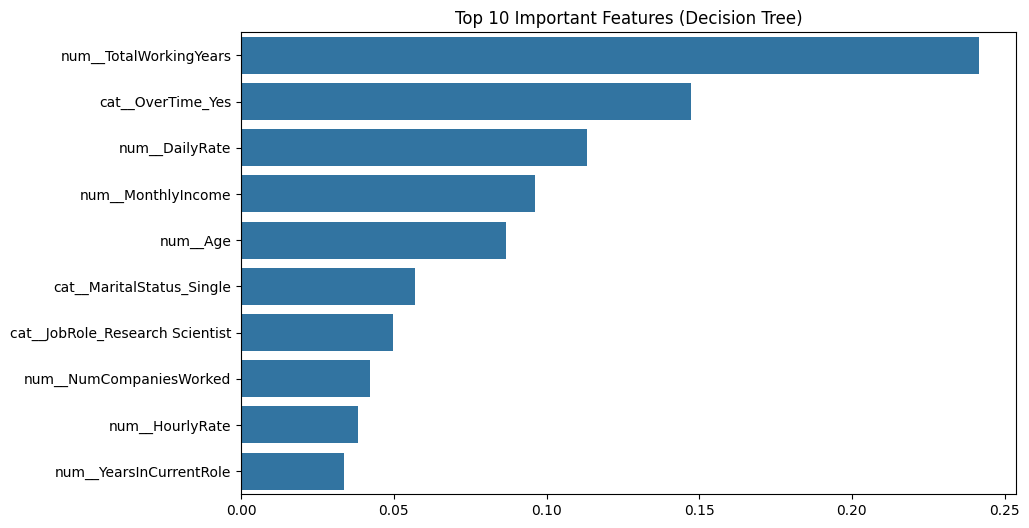

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:10], y=feature_names[indices][:10])
plt.title("Top 10 Important Features (Decision Tree)")
plt.show()

## **Save Files:**

### Save Transformed Data for ML (cleaned_hr_data.csv)

In [49]:
# Transform X with preprocessing pipeline
X_cleaned = dt_model.named_steps["preprocessor"].transform(X)

# Convert back to DataFrame with feature names
X_cleaned_df = pd.DataFrame(X_cleaned, columns=feature_names)

# Add target (Attrition) column
X_cleaned_df["Attrition"] = y.values

# Save to CSV for Power BI
X_cleaned_df.to_csv("cleaned_hr_data.csv", index=False)

In [50]:
print("Cleaned dataset saved as 'cleaned_hr_data.csv' for Power BI")

Cleaned dataset saved as 'cleaned_hr_data.csv' for Power BI


### Save Original and cleaned Categorical + Numerical Data for Power BI (hr_data_cleaned_original.csv)

In [51]:
# Combine original X (categorical + numerical) with target y
df_cleaned = pd.concat([X, y], axis=1)

# Save as CSV
df_cleaned.to_csv("hr_data_cleaned_original.csv", index=False)

print("Saved 'hr_data_cleaned_original.csv' with categorical + numerical columns for Power BI")


Saved 'hr_data_cleaned_original.csv' with categorical + numerical columns for Power BI
